<a href="https://colab.research.google.com/github/SoniaPMi/Master-IA/blob/main/Ejercicio_Jumanji00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

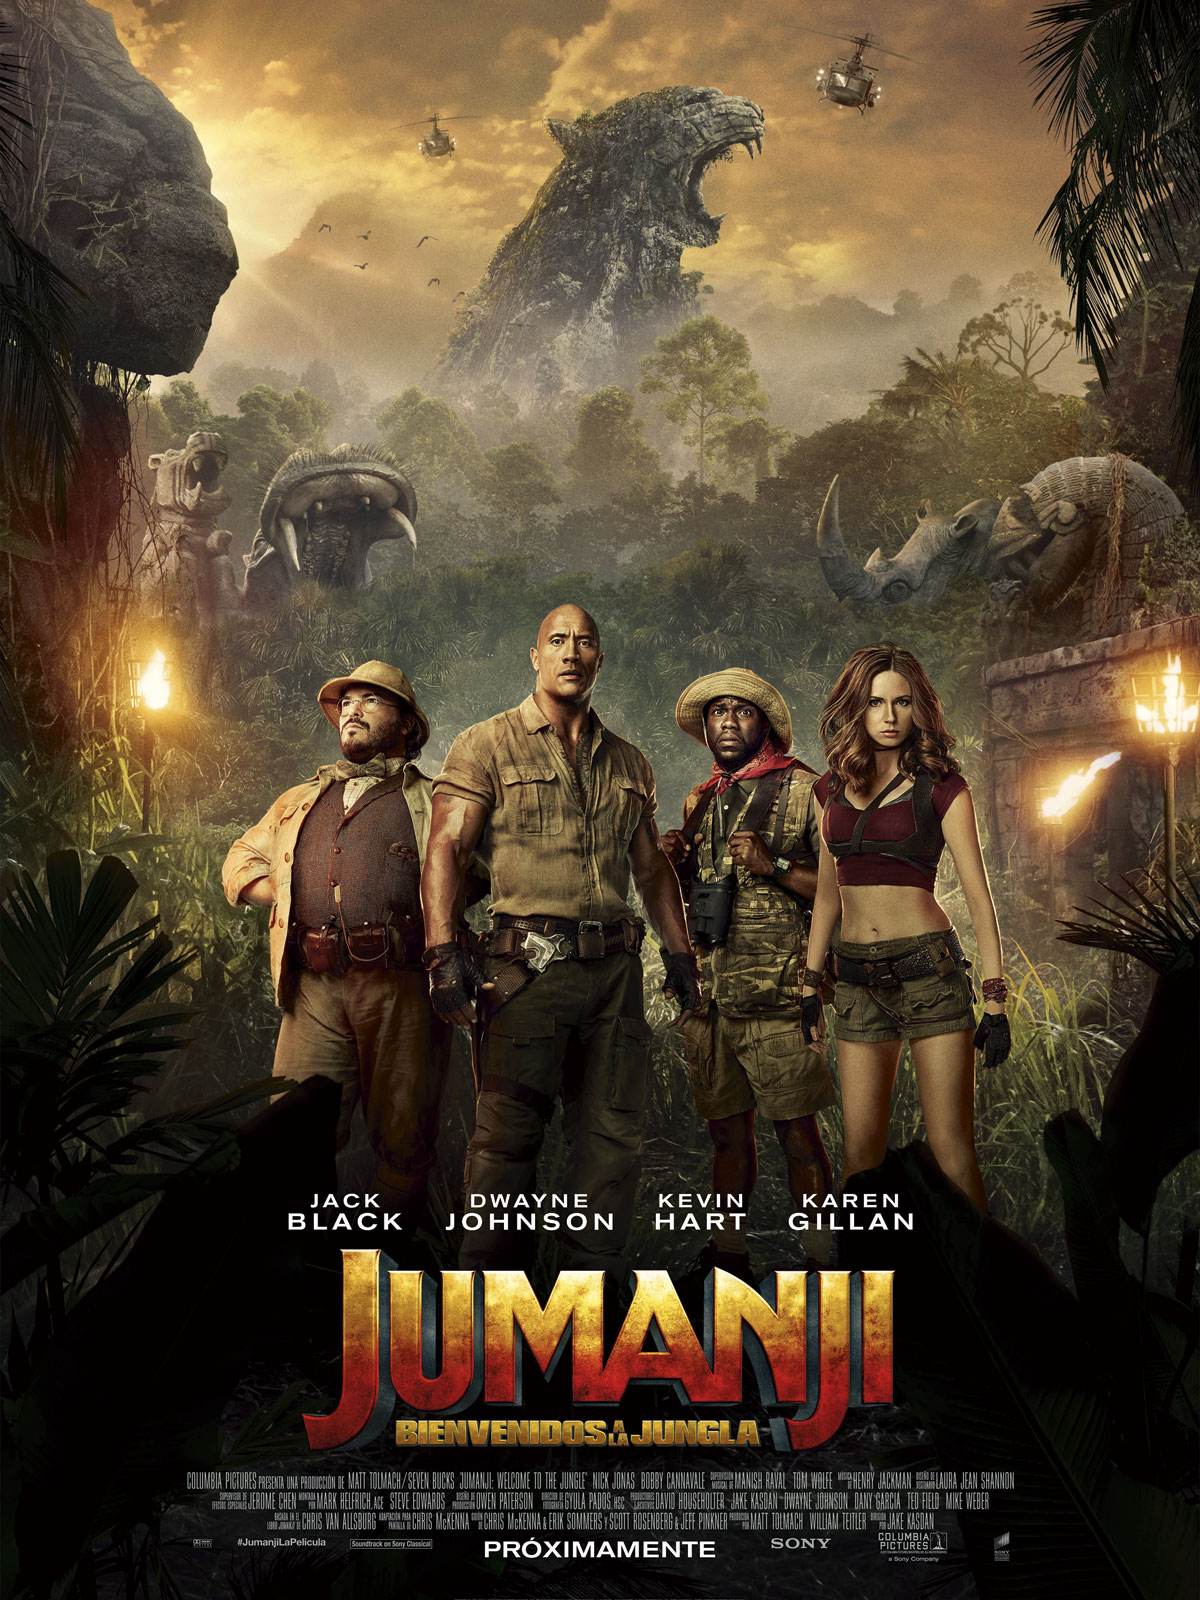

# Ejercicio Jumanji - Bienvenidos a la jungla

Wellcome to Jumanji dear adventurers. Unfortunately not everything are good news, some players have been playing to the game and, as a result of they dumb plays, a stampede of cats and dogs is now running in the real world.

As a fellow explorer I am sure that you understand the urgency of the situation. To solve it, we need to create a computer vision algorithm using CNNs to detect the cats and the dogs.

In order to do so we require the following steps:

- Create an image preprocessing pipeline to treat the images that we are providing. Perform data augmentation over the dataset, at least rotations.

- Test several architechtures (at least 3) and evaluate their performance over the dataset.

- Visualize the feature maps of some of the early and late layers of the models developed. ¿Is there any feature which could be explained through them?

- Finally select the model which performs the best over the whole dataset and explain why.

Fellow adventurer, thanks for your time, Jumanji will not forget your efforts.

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

--2022-01-10 18:30:29--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 173.194.210.128, 173.194.211.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   300MB/s    in 0.2s    

2022-01-10 18:30:30 (300 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import tensorflow.keras as keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D

from keras.utils import np_utils
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from keras import optimizers
from keras import models

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [5]:
img = Image.open("cats_and_dogs_filtered/train/cats/cat.252.jpg")
img.size

(149, 113)

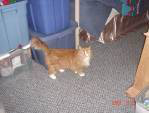

In [6]:
img

In [7]:
img2 = Image.open("cats_and_dogs_filtered/train/cats/cat.226.jpg")
img2.size

(499, 375)

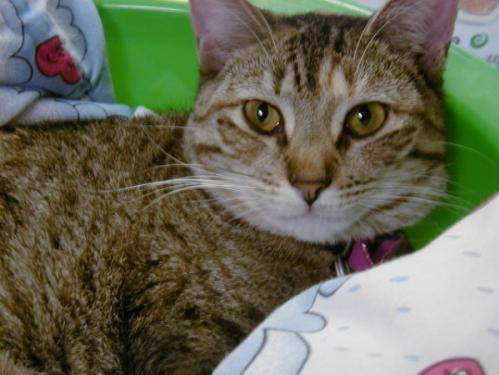

In [8]:
img2

In [9]:
#cada imagen tiene un tamaño y una resolución diferente

In [10]:
#1. ajuste resolución. Alternativas
# - cambio resolución
# - cropping (reocortado)
# - padding (relleno)

#2. data aumentation a cada conjunto

In [11]:
def change_resolution(img, desired_resolution):
  width, height = img.size
  if width > height:
    aspect_relatio = width/height
    new_width = desired_resolution
    new_height = round(desired_resolution/aspect_relatio)
    resized_img = img.resize((new_width,new_height))
  else:
    aspect_relatio = height/width
    new_height = desired_resolution
    new_width = round(desired_resolution/aspect_relatio)
    resized_img = img.resize((new_width,new_height))
  return resized_img

def pad_img(img, desired_resolution):
  width, height = img.size
  array = np.array(img)
  if width > height:
    total_pad = desired_resolution - height
    pad = total_pad/2
    if isinstance(pad, float):
      pad_0 = int(np.ceil(pad))
      pad_1 = int(np.floor(pad))
      padded_image = np.pad(array, ((pad_0, pad_1),(0,0),(0,0)))
    else:
      padded_image = np.pad(array, ((pad, pad),(0,0),(0,0)))
  else:
    total_pad = desired_resolution - width
    pad = total_pad/2
    if isinstance(pad, float):
      pad_0 = int(np.ceil(pad))
      pad_1 = int(np.floor(pad))
      padded_image = np.pad(array, ((0,0),(pad_0, pad_1),(0,0)))
    else:
      padded_image = np.pad(array, ((0,0),(pad, pad),(0,0)))
  return padded_image

In [12]:
import os

In [13]:
cat_files = os.listdir("cats_and_dogs_filtered/train/cats")#libreria os. para listar un directorio
dog_files = os.listdir("cats_and_dogs_filtered/train/dogs")

In [14]:
preprocess_path = "preprocessed_dataset/train/cats"
#guardar imagenes con la estructura preprocessed_dataset/train/cats
os.makedirs(preprocess_path, exist_ok=True)

for file_ in cat_files:
  path = os.path.join("cats_and_dogs_filtered/train/cats", file_)
  img = Image.open(path)
  resized_img = change_resolution(img, 64)
  padded_img = pad_img(resized_img, 64)
  print(padded_img.shape)

  #guardar imagenes en una carpeta con la siguiente estructrua preprocessed_datasat/train/cats
  #ya hemos importado os librery
  preprocess_image = Image.fromarray(padded_img)
  save_path = os.path.join(preprocess_path, file_) 
  #unir el nombre del fichero a otro directorio
  preprocess_image.save(save_path)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64,

In [15]:
preprocess_path = "preprocessed_dataset/train/dogs"
#guardar imagenes con la estructura preprocessed_dataset/train/cats
os.makedirs(preprocess_path, exist_ok=True)

for file_ in dog_files:
  path = os.path.join("cats_and_dogs_filtered/train/dogs", file_)
  img = Image.open(path)
  resized_img = change_resolution(img, 64)
  padded_img = pad_img(resized_img, 64)
  print(padded_img.shape)

  #guardar imagenes en una carpeta con la siguiente estructrua preprocessed_datasat/train/cats
  #ya hemos importado os librery
  preprocess_image = Image.fromarray(padded_img)
  save_path = os.path.join(preprocess_path, file_) 
  #unir el nombre del fichero a otro directorio
  preprocess_image.save(save_path)

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64,

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rotar + filtro borroso

In [17]:
from PIL import ImageFilter

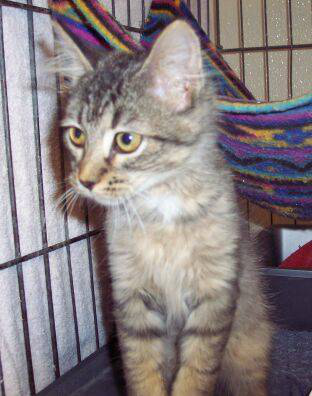

In [18]:
img = Image.open("cats_and_dogs_filtered/train/cats/cat.2.jpg")
img

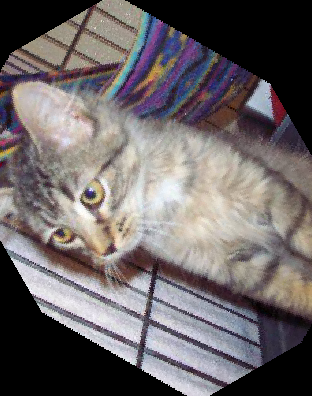

In [20]:
img = img.rotate(30)
img

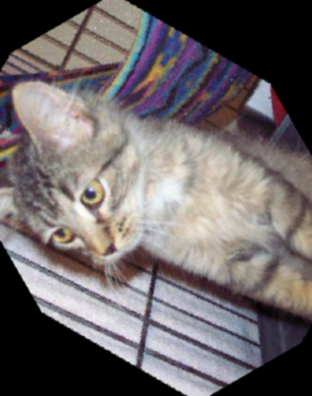

In [24]:
img.filter(ImageFilter.BoxBlur(0.5))

In [26]:
cat_files_ = os.listdir("preprocessed_dataset/train/cats")[0:100] #libreria os. para listar un directorio
dog_files_ = os.listdir("preprocessed_dataset/train/dogs")[0:100]

In [25]:
def change_rotation(img, desired_angle):
  redesign = img.rotate(30)
  redesign = redesign.filter(ImageFilter.BoxBlur(0.5))
  return redesign

In [40]:
preprocess_path = "preprocessed_dataset/train/cats2"

#preprocess_path = "preprocessed_dataset/train/dogs"
#guardar imagenes con la estructura preprocessed_dataset/train/cats
os.makedirs(preprocess_path, exist_ok=True)

for file_ in cat_files_:
  path = os.path.join("preprocessed_dataset/train/cats", file_) 
  #unir el nombre del directorio con el numero del fichero
  img = Image.open(path)
  redesign = change_rotation(img, 30)

  #guardar imagenes en una carpeta con la siguiente estructrua preprocessed_datasat/train/cats
  #ya hemos importado os librery
  #preprocess_image = Image.fromarray(redesign).
  #save_path = os.path.join("preprocessed_dataset/train/cats", file_)
  save_path = os.path.join(preprocess_path, file_) 
  #unir el nombre del fichero a otro directorio
  redesign.save(save_path)

In [42]:
preprocess_path = "preprocessed_dataset/train/dogs2"

#preprocess_path = "preprocessed_dataset/train/dogs"
#guardar imagenes con la estructura preprocessed_dataset/train/cats
os.makedirs(preprocess_path, exist_ok=True)

for file_ in dog_files_:
  path = os.path.join("preprocessed_dataset/train/dogs", file_) 
  #unir el nombre del directorio con el numero del fichero
  img = Image.open(path)
  redesign = change_rotation(img, 30)

  #guardar imagenes en una carpeta con la siguiente estructrua preprocessed_datasat/train/cats
  #ya hemos importado os librery
  #preprocess_image = Image.fromarray(redesign).
  #save_path = os.path.join("preprocessed_dataset/train/cats", file_)
  save_path = os.path.join(preprocess_path, file_) 
  #unir el nombre del fichero a otro directorio
  redesign.save(save_path)